# Viz Large Fasttrees

* Are there temporal/geographic patterns?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
from matplotlib.collections import PatchCollection, LineCollection
import matplotlib.path as mpath
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

import time
import numpy as np
import pandas as pd
import json

#import sys
#sys.path.append("/Users/don/Google Drive/automata")

import xio
import baltic3 as bt
import baltic3_utils as btu

In [4]:
t0 = time.time()
tre = btu.austechia_read_tree("data/trees/d1_cdh_4253_ft.nex", date_delim="|")

print("Done in %.2fs" % (time.time() - t0))

with open('data/cc_dict.json') as handle:
    cc_dict = json.loads(handle.read())

Number of objects found in tree string: 7971

Tree height: 0.099210
Tree length: 8.270220

Numbers of objects in tree: 7971 (3718 nodes and 4253 leaves)

Highest tip date: 2016.0000
Done in 28.95s


In [5]:
# Plot params
branchWidth=0.3
s=0

# Set axis limits
xlimits = [-(tre.treeHeight*0.01), tre.treeHeight*1.23]
ylimits = [-len(tre.leaves)*0.02, len(tre.leaves)*1.02]
track_x = tre.treeHeight*1.03

continent_cdict = {'South Asia': "#fe613f", "East Asia": "#d9330f", 
                   "Central Asia": "#d9580f", "Southeast Asia": "#900C3F", 
                  "West Asia": "#fd7878", "Russia And China": "indianred", 
                  "Oceania":"steelblue", "Pacific":"cyan", 
                  "North America":"#7dcea0", "Central America":"#1e8449", 
                  "South America":"#034d12", "Africa": "purple", "Europe":"grey", 
                   "*": "white"}

# Get the min and max cyears

cyear_ls = []
for k in tre.leaves:
    cy = int(k.name.split("|")[-1][:4])
    cyear_ls.append(cy)
        
cyear_ls = list(set(cyear_ls))
cyear_ls.sort()
min_cyear = cyear_ls[0]
max_cyear = cyear_ls[-1]

In [17]:
cyear_ls[0]

1944

Done in 4.74s


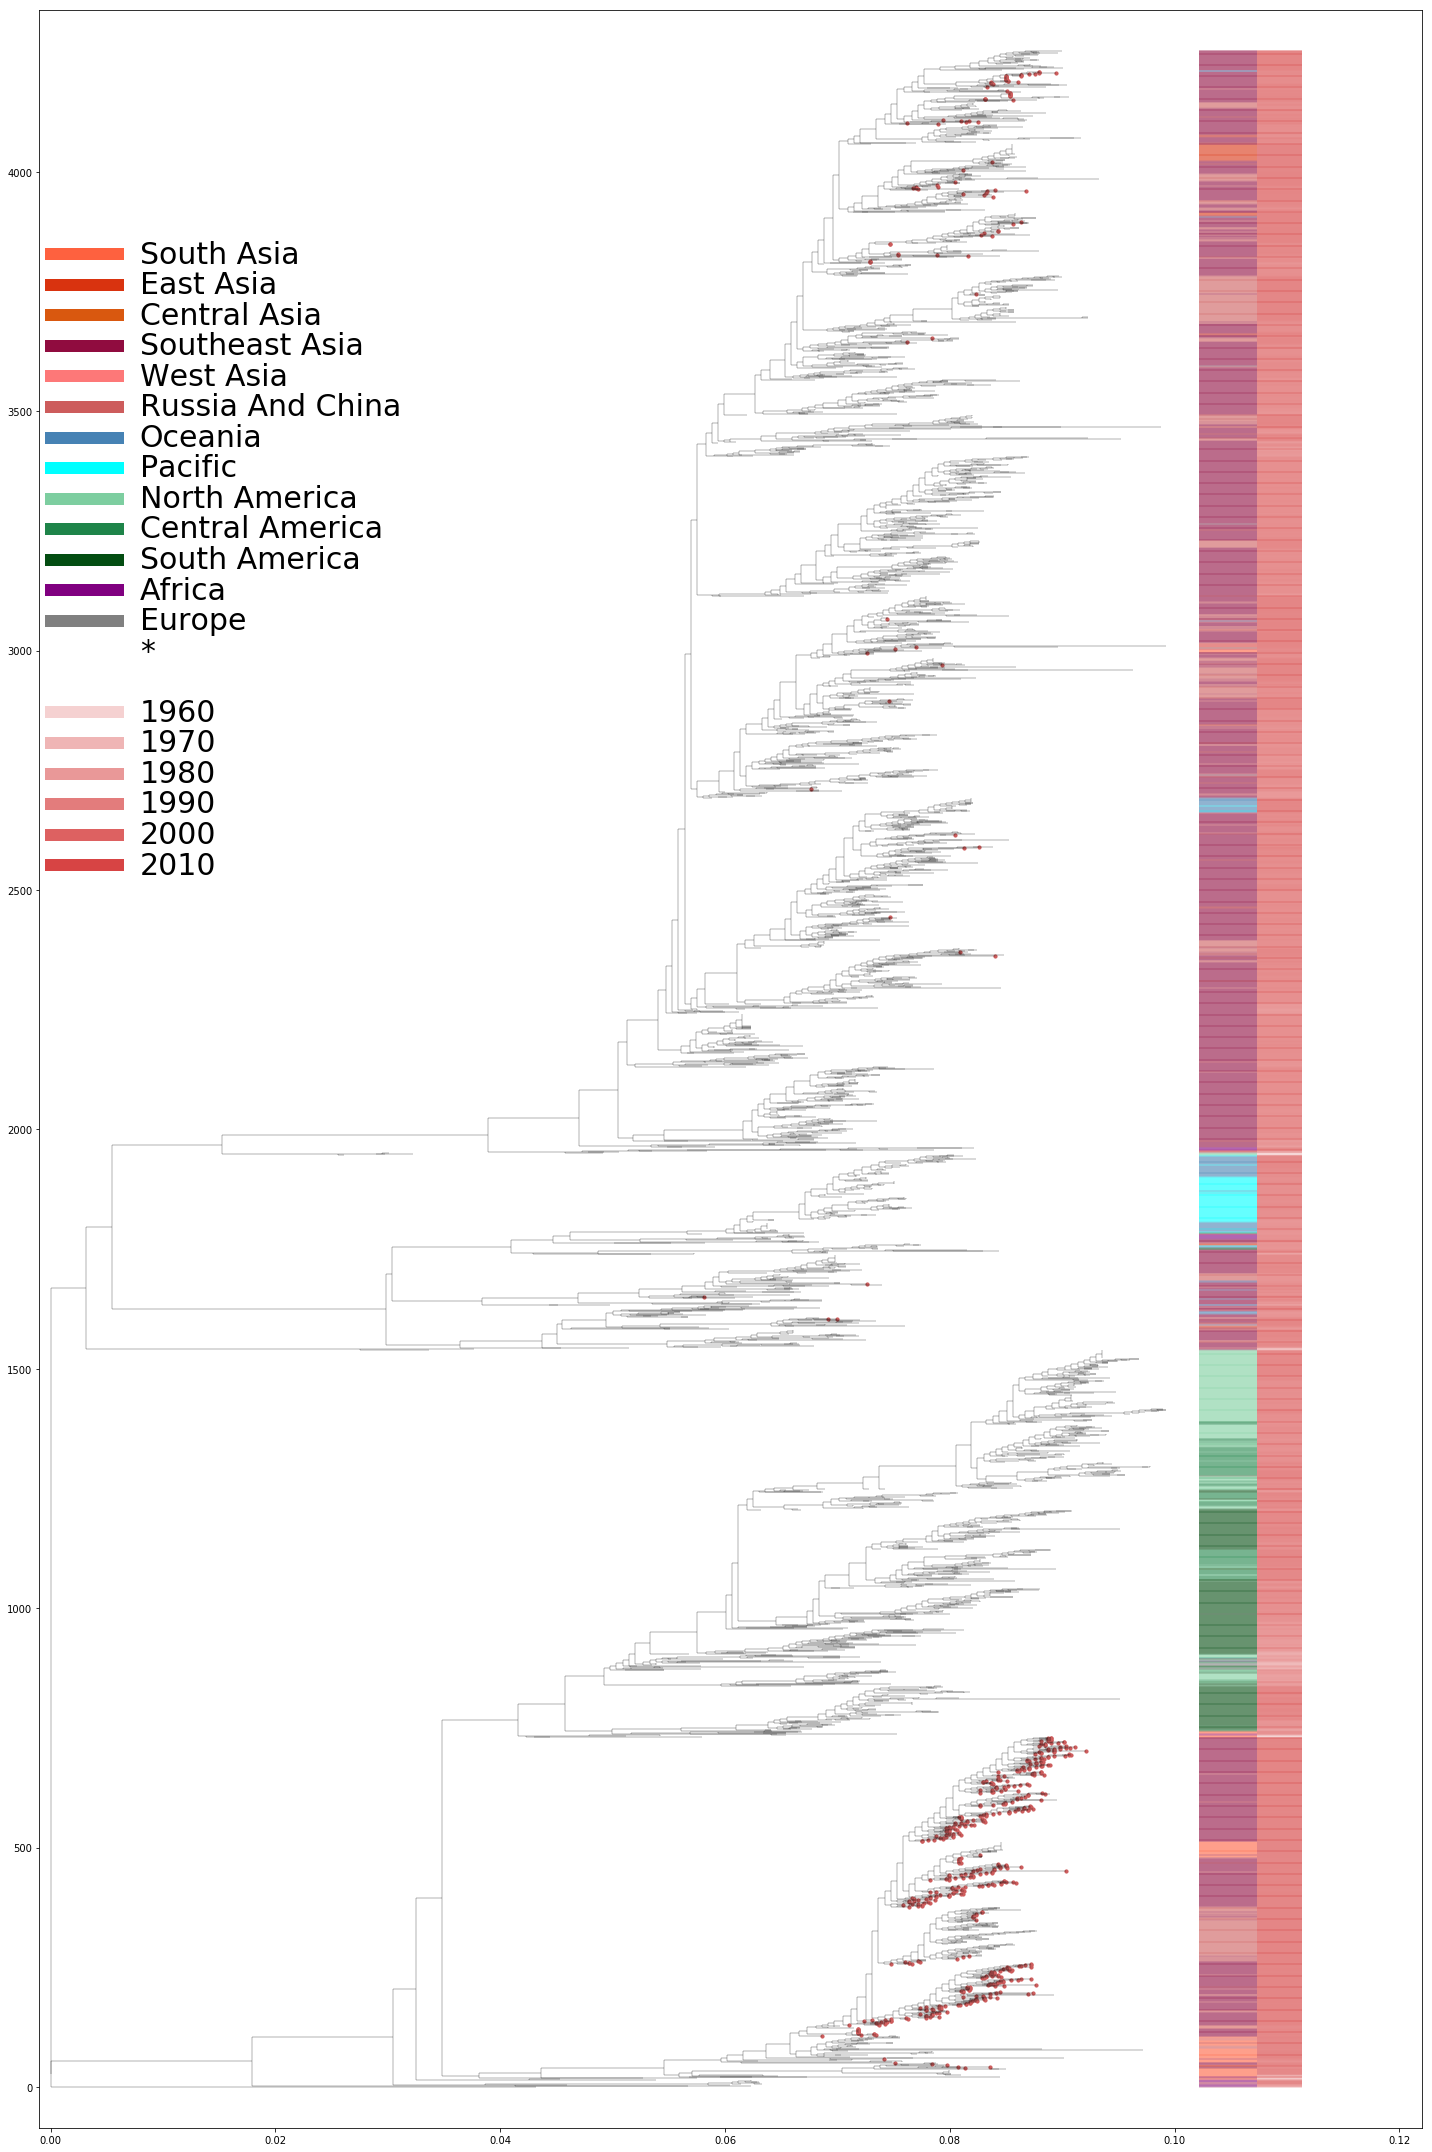

In [37]:
verbose=False
t0 = time.time()

fig,ax = plt.subplots(figsize=(20,30),facecolor='w')

# ==================== Draw just the HA tree ====================

lines_ls = [] # patch collection for new sequences
# lines_ls_dict for continent tracks
continent_lines_dict = {}
for k in list(continent_cdict.keys()):
    continent_lines_dict[k] = []
# lines_ls_dict for time tracks
cy_lines_dict = {}
for k in cyear_ls:
    cy_lines_dict[k] = []

for k in tre.Objects:
    c = 'k'
    x=k.height
    y=k.y

    xp = k.parent.height
    if x is None: # matplotlib won't plot Nones, like root
        x = 0
    if xp==None:
        xp = x

    if isinstance(k,bt.leaf) or k.branchType=='leaf':
        # Draw continent tracks
        continent = xio.lookup_key(cc_dict, k.name.split("|")[2].split("/")[0])
        if continent =="*":
            print("WARNING: continent not found for %s!" % k.name)
        line = np.array([[track_x, k.y], [track_x*1.05, k.y]])
        continent_lines_dict[continent].append(line)
        
        # Draw time tracks
        cyear = int(k.name.split("|")[-1][:4])
        line = np.array([[track_x*1.05, k.y], [track_x*1.09, k.y]])
        cy_lines_dict[cyear].append(line)
        
        # Highlight SG sequences
        if "Singapore" in k.name:
            ax.scatter(x, y, s=10, c="indianred")
        
        
    elif isinstance(k,bt.node) or k.branchType=='node':        
        line = np.array([[x, k.children[0].y], [x, k.children[-1].y]])
        lines_ls.append(line)
        
    line = np.array([[xp, y], [x, y]])
    lines_ls.append(line)

# Add title
#ax.text(0, title_y, seg, fontsize=title_size)

# ==================== Legend ====================
x0 = 0; y0 = 0.9*len(tre.leaves); yi = 0.015*len(tre.leaves)
for k in list(continent_cdict.keys()):
    ax.plot([x0, 0.06*tre.treeHeight], [y0, y0], 
            c=continent_cdict[k], 
            lw=branchWidth*40)
    ax.text(0.08*tre.treeHeight, y0, k, 
            color="k", 
            fontsize=30, 
            verticalalignment="center")
    y0 -= yi

# Time track legend
y0 -= yi
cy_legend_ls = [1960, 1970, 1980, 1990, 2000, 2010]
for k in cy_legend_ls:
    cy_norm = (max_cyear - k)/(max_cyear - min_cyear)
    ax.plot([x0, 0.06*tre.treeHeight], [y0, y0], 
            c=(0.83, 0.2, 0.2, 1-cy_norm), 
            lw=branchWidth*40)
    ax.text(0.08*tre.treeHeight, y0, k, 
            color="k", 
            fontsize=30, 
            verticalalignment="center")
    y0 -= yi


# ==================== Line Collections ====================
line_collection = LineCollection(lines_ls, lw=branchWidth,color='k')
ax.add_collection(line_collection)

for k in list(continent_lines_dict.keys()):
    line_collection = LineCollection(continent_lines_dict[k], 
                                     color=continent_cdict[k], 
                                     lw=branchWidth*1.35)
    ax.add_collection(line_collection)
    
for k in list(cy_lines_dict.keys()):
    cy_norm = (max_cyear - k)/(max_cyear - min_cyear)
    line_collection = LineCollection(cy_lines_dict[k], 
                                     color=(0.83, 0.2, 0.2, 1-cy_norm), 
                                     lw=branchWidth*1.35)
    ax.add_collection(line_collection)

ax.set_ylim(ylimits[0],ylimits[1])
ax.set_xlim(xlimits[0],xlimits[1])

plt.tight_layout()
plt.savefig("figures/d1_cdh_ft.pdf", bbox="inches")

print("Done in %.2fs" % (time.time() - t0))

In [32]:
for k in tre.leaves[:5]:
    print(k.name)

KU529693|HomoSapiens|Indonesia|undef|2014
KU529700|HomoSapiens|Indonesia|undef|2015
KU529703|HomoSapiens|Indonesia|undef|2014
KU529695|HomoSapiens|Indonesia|undef|2014
KU529718|HomoSapiens|Indonesia|undef|2015


In [33]:
min_cyear

1944